In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv('data/orders_x.csv')
orders.head(30)

,Order_ID,Order_Date,CustomerName,State,City
0,B-25601,04-01-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,04-01-2018,Pearl,Maharashtra,Pune
2,B-25603,04-03-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,04-03-2018,Divsha,Rajasthan,Jaipur
4,B-25605,04-05-2018,Kasheen,West Bengal,Kolkata
5,B-25606,04-06-2018,Hazel,Karnataka,Bangalore
6,B-25607,04-06-2018,Sonakshi,Jammu and Kashmir,Kashmir
7,B-25608,04-08-2018,Aarushi,Tamil Nadu,Chennai
8,B-25609,04-09-2018,Jitesh,Uttar Pradesh,Lucknow
9,B-25610,04-09-2018,Yogesh,Bihar,Patna


In [3]:
orders.shape

(500, 5)

In [4]:
targets = pd.read_csv('data/targets_x.csv')
targets.head()

,Order_Month,Category,Target
0,April-2018,Furniture,10400.0
1,May-2018,Furniture,10500.0
2,June-2018,Furniture,10600.0
3,July-2018,Furniture,10800.0
4,August-2018,Furniture,10900.0


In [5]:
targets.shape

(36, 3)

In [6]:
details = pd.read_csv('data/details_x.csv')
details.head()

,Order_ID,Amount,Profit,Quantity,Category,Subcategory
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [7]:
details.shape

(1500, 6)

In [8]:
merged_df = pd.merge(orders, details, on='Order_ID')
merged_df

,Order_ID,Order_Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Subcategory
0,B-25601,04-01-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,04-01-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,04-01-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,04-01-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,04-01-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,03-30-2019,Bhishm,Maharashtra,Mumbai,835.0,267.0,5,Electronics,Phones
1496,B-26099,03-30-2019,Bhishm,Maharashtra,Mumbai,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,03-31-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2,Furniture,Chairs
1498,B-26100,03-31-2019,Hitika,Madhya Pradesh,Indore,34.0,10.0,2,Clothing,T-shirt


In [9]:
merged_df.shape

(1500, 10)

In [10]:
merged_df.isnull().sum()

Order_ID        0
Order_Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Subcategory     0
dtype: int64

In [11]:
merged_df['Order_Date'] = pd.to_datetime(merged_df['Order_Date'], format='%m-%d-%Y')
merged_df.set_index('Order_Date', inplace=True)
merged_df

,Order_ID,CustomerName,State,City,Amount,Profit,Quantity,Category,Subcategory
Order_Date,,,,,,,,,
2018-04-01,B-25601,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
2018-04-01,B-25601,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2018-04-01,B-25601,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
2018-04-01,B-25601,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
2018-04-01,B-25602,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...,...,...,...
2019-03-30,B-26099,Bhishm,Maharashtra,Mumbai,835.0,267.0,5,Electronics,Phones
2019-03-30,B-26099,Bhishm,Maharashtra,Mumbai,2366.0,552.0,5,Clothing,Trousers
2019-03-31,B-26100,Hitika,Madhya Pradesh,Indore,828.0,230.0,2,Furniture,Chairs


In [12]:
monthly_amount = merged_df.resample('M').sum()
monthly_amount

,Amount,Profit,Quantity
Order_Date,,,
2018-04-30,32726.0,-3960.0,389
2018-05-31,28545.0,-3584.0,423
2018-06-30,23658.0,-4970.0,369
2018-07-31,12966.0,-2138.0,240
2018-08-31,30899.0,-2180.0,446
2018-09-30,26628.0,-4963.0,331
2018-10-31,31615.0,3093.0,419
2018-11-30,48086.0,11619.0,578
2018-12-31,37579.0,5284.0,412


In [13]:
monthly_amount.reset_index(inplace=True)

In [14]:
monthly_amount['Order_Date'] = monthly_amount['Order_Date'].dt.strftime('%d-%m-%Y')
monthly_amount

,Order_Date,Amount,Profit,Quantity
0,30-04-2018,32726.0,-3960.0,389
1,31-05-2018,28545.0,-3584.0,423
2,30-06-2018,23658.0,-4970.0,369
3,31-07-2018,12966.0,-2138.0,240
4,31-08-2018,30899.0,-2180.0,446
5,30-09-2018,26628.0,-4963.0,331
6,31-10-2018,31615.0,3093.0,419
7,30-11-2018,48086.0,11619.0,578
8,31-12-2018,37579.0,5284.0,412
9,31-01-2019,61439.0,9760.0,745


In [15]:
from datetime import datetime

def convert_month(month):
    datetime_obj = datetime.strptime(month, '%d-%m-%Y')
    return datetime_obj.strftime('%B-%Y')

monthly_amount['Order_Date']=monthly_amount['Order_Date'].apply(convert_month)
monthly_amount

,Order_Date,Amount,Profit,Quantity
0,April-2018,32726.0,-3960.0,389
1,May-2018,28545.0,-3584.0,423
2,June-2018,23658.0,-4970.0,369
3,July-2018,12966.0,-2138.0,240
4,August-2018,30899.0,-2180.0,446
5,September-2018,26628.0,-4963.0,331
6,October-2018,31615.0,3093.0,419
7,November-2018,48086.0,11619.0,578
8,December-2018,37579.0,5284.0,412
9,January-2019,61439.0,9760.0,745


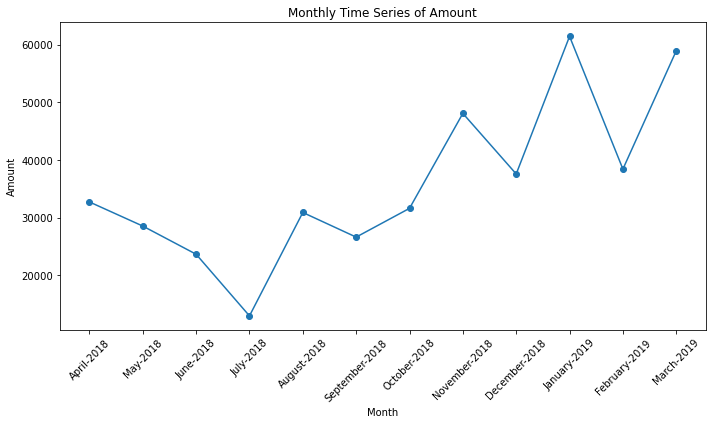

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_amount['Order_Date'], monthly_amount['Amount'], marker='o')
plt.title('Monthly Time Series of Amount')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

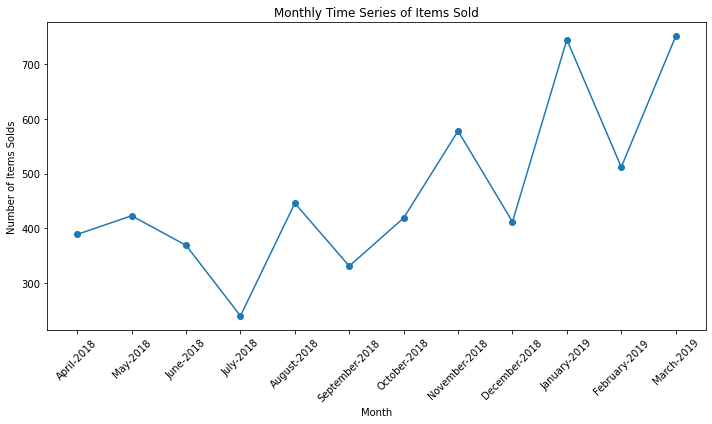

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_amount['Order_Date'], monthly_amount['Quantity'], marker='o')
plt.title('Monthly Time Series of Items Sold')
plt.xlabel('Month')
plt.ylabel('Number of Items Solds')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

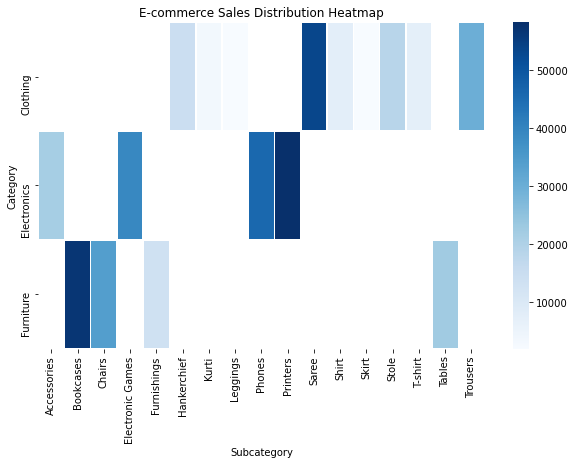

In [18]:
sales = merged_df.pivot_table(index='Category', columns='Subcategory', values='Amount', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(data=sales, cmap='Blues', linewidths=0.5)
plt.title('E-commerce Sales Distribution Heatmap')
plt.xlabel('Subcategory')
plt.ylabel('Category')
plt.show()

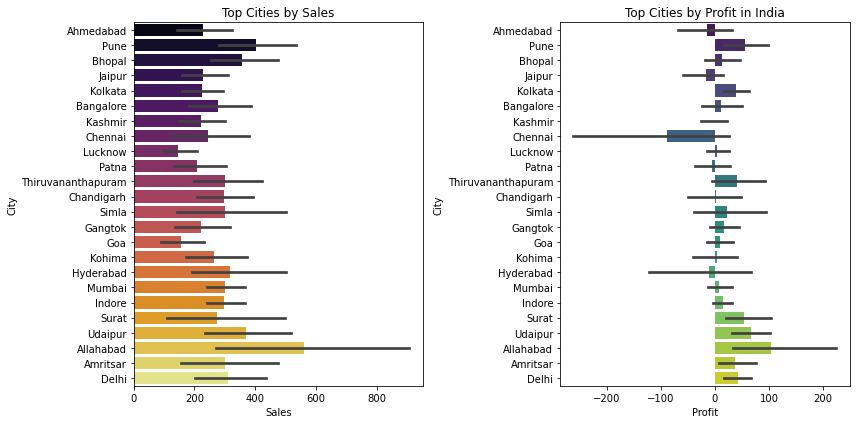

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot top cities by sales
sns.barplot(data=merged_df, x='Amount', y='City', ax=ax1, palette='inferno')
ax1.set_title('Top Cities by Sales')
ax1.set_xlabel('Sales')
ax1.set_ylabel('City')

# Plot top cities by profit
sns.barplot(data=merged_df, x='Profit', y='City', ax=ax2, palette='viridis')
ax2.set_title('Top Cities by Profit in India')
ax2.set_xlabel('Profit')
ax2.set_ylabel('City')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

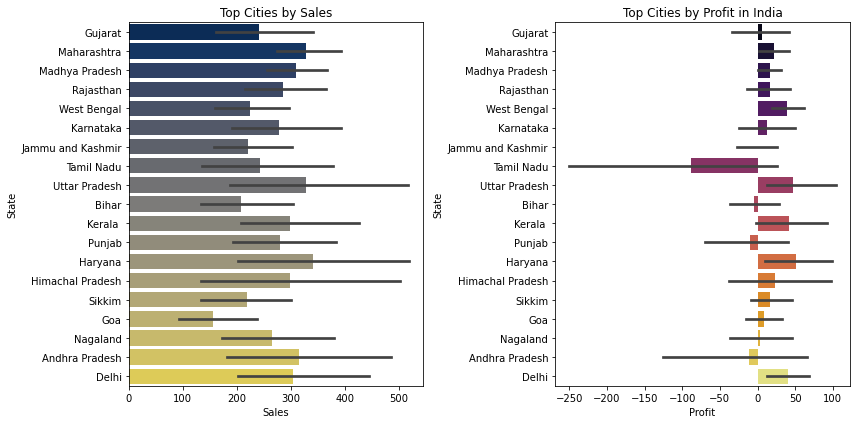

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot top states by sales
sns.barplot(data=merged_df, x='Amount', y='State', ax=ax1, palette='cividis')
ax1.set_title('Top Cities by Sales')
ax1.set_xlabel('Sales')
ax1.set_ylabel('State')

# Plot top states by profit
sns.barplot(data=merged_df, x='Profit', y='State', ax=ax2, palette='inferno')
ax2.set_title('Top Cities by Profit in India')
ax2.set_xlabel('Profit')
ax2.set_ylabel('State')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

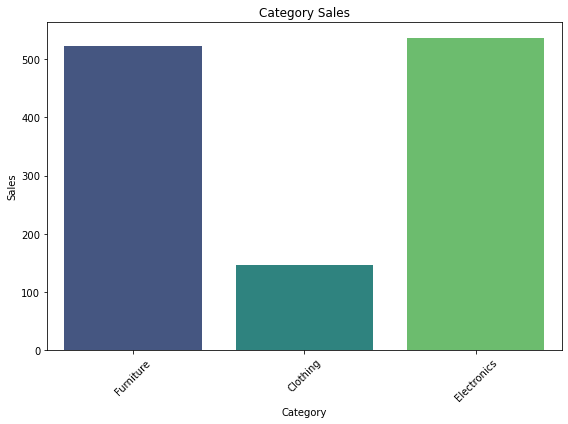

In [21]:
fig, (ax) = plt.subplots(figsize=(8, 6))

sns.barplot(data=merged_df, y='Amount', x='Category', ax=ax, palette='viridis', ci=None)
ax.set_title('Category Sales')
ax.set_xlabel('Category')
ax.set_ylabel('Sales')

plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

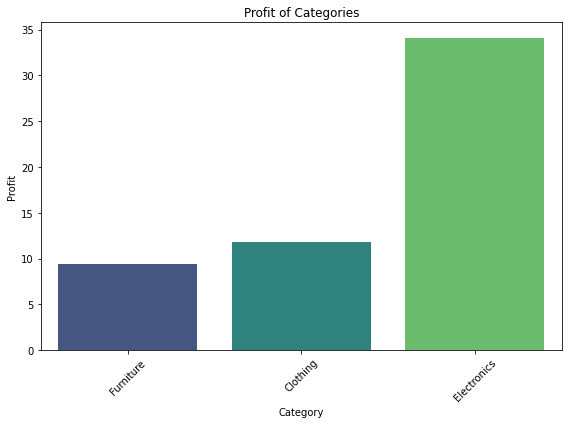

In [22]:
fig, (ax) = plt.subplots(figsize=(8, 6))

sns.barplot(data=merged_df, y='Profit', x='Category', ax=ax, palette='viridis', ci=None)
ax.set_title('Profit of Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Profit')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

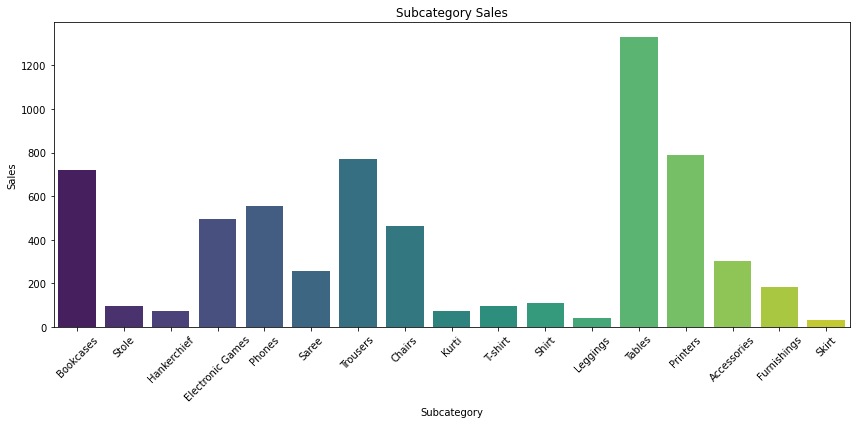

In [23]:
fig, (ax) = plt.subplots(figsize=(12, 6))

sns.barplot(data=merged_df, y='Amount', x='Subcategory', ax=ax, palette='viridis', ci=None)
ax.set_title('Subcategory Sales')
ax.set_xlabel('Subcategory')
ax.set_ylabel('Sales')

plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

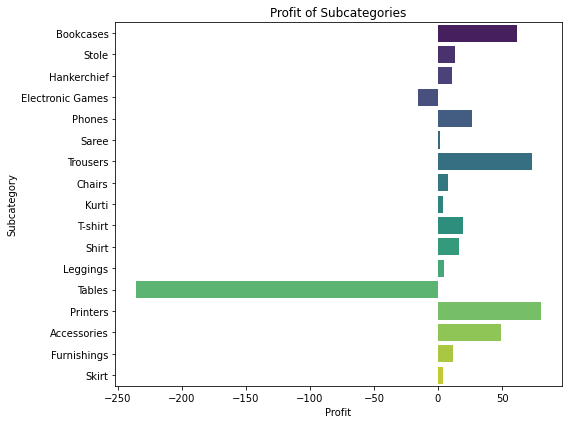

In [24]:
fig, (ax) = plt.subplots(figsize=(8, 6))

sns.barplot(data=merged_df, x='Profit', y='Subcategory', ax=ax, palette='viridis', ci=None)
ax.set_title('Profit of Subcategories')
ax.set_xlabel('Profit')
ax.set_ylabel('Subcategory')
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [25]:
categories_sold = merged_df.groupby('Category')['Quantity'].sum()
categories_sold

Category
Clothing       3516
Electronics    1154
Furniture       945
Name: Quantity, dtype: int64

In [26]:
merged_df.groupby('Subcategory')['Quantity'].sum()

Subcategory
Accessories         262
Bookcases           297
Chairs              277
Electronic Games    297
Furnishings         310
Hankerchief         754
Kurti               164
Leggings            186
Phones              304
Printers            291
Saree               782
Shirt               271
Skirt               248
Stole               671
T-shirt             305
Tables               61
Trousers            135
Name: Quantity, dtype: int64

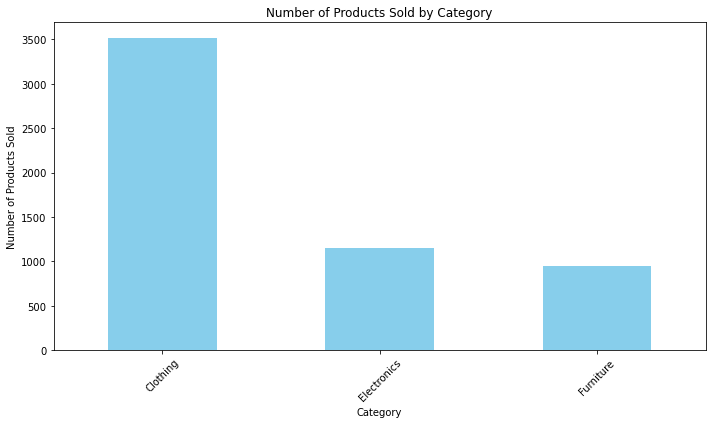

In [27]:
plt.figure(figsize=(10, 6))
                    
categories_sold.plot(kind='bar', color='skyblue')

plt.title('Number of Products Sold by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [28]:
categories_monthly = merged_df.groupby('Category').resample('M').sum()
categories_monthly

Amount  Profit  Quantity
Category    Order_Date                           
Clothing    2018-04-30  13478.0  -184.0       251
            2018-05-31   9518.0  -267.0       233
            2018-06-30   8782.0 -2036.0       235
            2018-07-31   2981.0   -48.0       142
            2018-08-31  11822.0 -1075.0       276
            2018-09-30  10717.0 -1585.0       192
            2018-10-31  11488.0  2148.0       284
            2018-11-30  16270.0  3736.0       380
            2018-12-31   9545.0  1901.0       259
            2019-01-31  13466.0  1691.0       436
            2019-02-28   9569.0  1822.0       312
            2019-03-31  21418.0  5060.0       516
Electronics 2018-04-30  11127.0  -351.0        75
            2018-05-31  12807.0 -2523.0       116
            2018-06-30   9344.0 -2078.0        82
            2018-07-31   6502.0 -1633.0        40
            2018-08-31   9539.0 -1548.0        98
            2018-09-30   7207.0  -910.0        56
            2018-10-31  13361.0  2261.0        85
            2018-11-30  16651.0  3938.0       105
            2018-12-31  18560.0  3196.0       110
            2019-01-31  26716.0  4785.0       164
            2019-02-28  12593.0  1927.0        82
            2019-03-31  20860.0  3430.0       141
Furniture   2018-04-30   8121.0 -3425.0        63
            2018-05-31   6220.0  -794.0        74
            2018-06-30   5532.0  -856.0        52
            2018-07-31   3483.0  -457.0        58
            2018-08-31   9538.0   443.0        72
            2018-09-30   8704.0 -2468.0        83
            2018-10-31   6766.0 -1316.0        50
            2018-11-30  15165.0  3945.0        93
            2018-12-31   9474.0   187.0        43
            2019-01-31  21257.0  3284.0       145
            2019-02-28  16262.0  2168.0       118
            2019-03-31  16659.0  1587.0        94

In [29]:
categories_monthly.reset_index(inplace=True, level='Order_Date')
categories_monthly

,Order_Date,Amount,Profit,Quantity
Category,,,,
Clothing,2018-04-30,13478.0,-184.0,251
Clothing,2018-05-31,9518.0,-267.0,233
Clothing,2018-06-30,8782.0,-2036.0,235
Clothing,2018-07-31,2981.0,-48.0,142
Clothing,2018-08-31,11822.0,-1075.0,276
Clothing,2018-09-30,10717.0,-1585.0,192
Clothing,2018-10-31,11488.0,2148.0,284
Clothing,2018-11-30,16270.0,3736.0,380
Clothing,2018-12-31,9545.0,1901.0,259


In [30]:
categories_monthly['Order_Date'] = categories_monthly['Order_Date'].dt.strftime('%d-%m-%Y')
categories_monthly

,Order_Date,Amount,Profit,Quantity
Category,,,,
Clothing,30-04-2018,13478.0,-184.0,251
Clothing,31-05-2018,9518.0,-267.0,233
Clothing,30-06-2018,8782.0,-2036.0,235
Clothing,31-07-2018,2981.0,-48.0,142
Clothing,31-08-2018,11822.0,-1075.0,276
Clothing,30-09-2018,10717.0,-1585.0,192
Clothing,31-10-2018,11488.0,2148.0,284
Clothing,30-11-2018,16270.0,3736.0,380
Clothing,31-12-2018,9545.0,1901.0,259


In [31]:
categories_monthly['Order_Date']=categories_monthly['Order_Date'].apply(convert_month)
categories_monthly.reset_index(inplace=True)
categories_monthly

,Category,Order_Date,Amount,Profit,Quantity
0,Clothing,April-2018,13478.0,-184.0,251
1,Clothing,May-2018,9518.0,-267.0,233
2,Clothing,June-2018,8782.0,-2036.0,235
3,Clothing,July-2018,2981.0,-48.0,142
4,Clothing,August-2018,11822.0,-1075.0,276
5,Clothing,September-2018,10717.0,-1585.0,192
6,Clothing,October-2018,11488.0,2148.0,284
7,Clothing,November-2018,16270.0,3736.0,380
8,Clothing,December-2018,9545.0,1901.0,259
9,Clothing,January-2019,13466.0,1691.0,436


In [32]:
order_date_rename = {'Order_Date': 'Order_Month'}
categories_monthly.rename(columns=order_date_rename, inplace=True)
categories_monthly

,Category,Order_Month,Amount,Profit,Quantity
0,Clothing,April-2018,13478.0,-184.0,251
1,Clothing,May-2018,9518.0,-267.0,233
2,Clothing,June-2018,8782.0,-2036.0,235
3,Clothing,July-2018,2981.0,-48.0,142
4,Clothing,August-2018,11822.0,-1075.0,276
5,Clothing,September-2018,10717.0,-1585.0,192
6,Clothing,October-2018,11488.0,2148.0,284
7,Clothing,November-2018,16270.0,3736.0,380
8,Clothing,December-2018,9545.0,1901.0,259
9,Clothing,January-2019,13466.0,1691.0,436


In [33]:
categories = pd.merge(categories_monthly, targets, on=['Order_Month', 'Category'])
categories

,Category,Order_Month,Amount,Profit,Quantity,Target
0,Clothing,April-2018,13478.0,-184.0,251,12000.0
1,Clothing,May-2018,9518.0,-267.0,233,12000.0
2,Clothing,June-2018,8782.0,-2036.0,235,12000.0
3,Clothing,July-2018,2981.0,-48.0,142,14000.0
4,Clothing,August-2018,11822.0,-1075.0,276,14000.0
5,Clothing,September-2018,10717.0,-1585.0,192,14000.0
6,Clothing,October-2018,11488.0,2148.0,284,16000.0
7,Clothing,November-2018,16270.0,3736.0,380,16000.0
8,Clothing,December-2018,9545.0,1901.0,259,16000.0
9,Clothing,January-2019,13466.0,1691.0,436,16000.0


In [34]:
categories.isnull().sum()

Category       0
Order_Month    0
Amount         0
Profit         0
Quantity       0
Target         0
dtype: int64

In [35]:
categories['Sales_Difference'] = categories['Amount'] - categories['Target']
categories

,Category,Order_Month,Amount,Profit,Quantity,Target,Sales_Difference
0,Clothing,April-2018,13478.0,-184.0,251,12000.0,1478.0
1,Clothing,May-2018,9518.0,-267.0,233,12000.0,-2482.0
2,Clothing,June-2018,8782.0,-2036.0,235,12000.0,-3218.0
3,Clothing,July-2018,2981.0,-48.0,142,14000.0,-11019.0
4,Clothing,August-2018,11822.0,-1075.0,276,14000.0,-2178.0
5,Clothing,September-2018,10717.0,-1585.0,192,14000.0,-3283.0
6,Clothing,October-2018,11488.0,2148.0,284,16000.0,-4512.0
7,Clothing,November-2018,16270.0,3736.0,380,16000.0,270.0
8,Clothing,December-2018,9545.0,1901.0,259,16000.0,-6455.0
9,Clothing,January-2019,13466.0,1691.0,436,16000.0,-2534.0


In [36]:
# Pivot the data to group by category and order_month
pivot_df = categories.pivot(index='Order_Month', columns='Category', values='Sales_Difference').sort_index()
pivot_df

Category,Clothing,Electronics,Furniture
Order_Month,,,
April-2018,1478.0,2127.0,-2279.0
August-2018,-2178.0,539.0,-1362.0
December-2018,-6455.0,9560.0,-1926.0
February-2019,-6431.0,-3407.0,4662.0
January-2019,-2534.0,10716.0,9757.0
July-2018,-11019.0,-2498.0,-7317.0
June-2018,-3218.0,344.0,-5068.0
March-2019,5418.0,4860.0,4859.0
May-2018,-2482.0,3807.0,-4280.0


In [37]:
pivot_df.index = pd.to_datetime(pivot_df.index)
pivot_df = pivot_df.sort_index()
pivot_df

Category,Clothing,Electronics,Furniture
Order_Month,,,
2018-04-01,1478.0,2127.0,-2279.0
2018-05-01,-2482.0,3807.0,-4280.0
2018-06-01,-3218.0,344.0,-5068.0
2018-07-01,-11019.0,-2498.0,-7317.0
2018-08-01,-2178.0,539.0,-1362.0
2018-09-01,-3283.0,-1793.0,-2296.0
2018-10-01,-4512.0,4361.0,-4334.0
2018-11-01,270.0,7651.0,3865.0
2018-12-01,-6455.0,9560.0,-1926.0


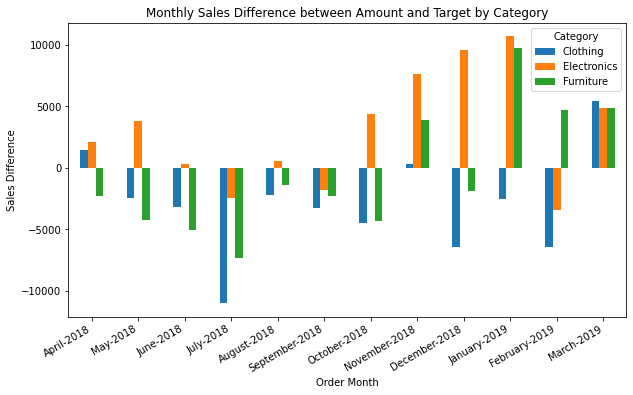

In [38]:
# Convert the index to datetime format
pivot_df.index = pd.to_datetime(pivot_df.index)

# Create a bar plot
ax = pivot_df.plot(kind='bar', figsize=(10, 6))

# Format the x-axis with mmmm-yyyy
ax.set_xticklabels(pivot_df.index.strftime('%B-%Y'))
ax.figure.autofmt_xdate()

plt.title('Monthly Sales Difference between Amount and Target by Category')
plt.xlabel('Order Month')
plt.ylabel('Sales Difference')
plt.legend(title='Category')

plt.show()

In [39]:
pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [72]:
states_amount = merged_df.groupby('State')['Amount'].sum()
states_amount = states_amount.rename('Total_Amount')
states_amount = states_amount.rename('Total_Amount').reset_index()
states_amount

,State,Total_Amount
0,Andhra Pradesh,13256.0
1,Bihar,12943.0
2,Delhi,22531.0
3,Goa,6705.0
4,Gujarat,21058.0
5,Haryana,8863.0
6,Himachal Pradesh,8666.0
7,Jammu and Kashmir,10829.0
8,Karnataka,15058.0
9,Kerala,13459.0


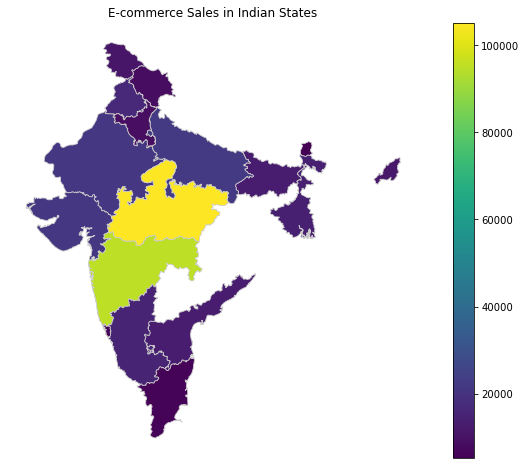

In [73]:
import geopandas as gpd

# Load Indian states GeoJSON data
india_states = gpd.read_file('geos/ne_10m_admin_1_states_provinces.shp')

india_states = india_states[india_states['admin'] == 'India']

merged = india_states.set_index('name').join(states_amount.set_index('State'))

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Total_Amount', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('E-commerce Sales in Indian States')
ax.axis('off')

plt.show()

In [78]:
cities_amount = merged_df.groupby('City')['Amount'].sum()
cities_amount = cities_amount.rename('Total_Amount')
cities_amount = cities_amount.rename('Total_Amount').reset_index()
cities_amount

,City,Total_Amount
0,Ahmedabad,14230.0
1,Allahabad,16857.0
2,Amritsar,4507.0
3,Bangalore,15058.0
4,Bhopal,23583.0
5,Chandigarh,21142.0
6,Chennai,6087.0
7,Delhi,25019.0
8,Gangtok,5276.0
9,Goa,6705.0
